# I. Set Up

In [133]:
# PYTHON Imports 
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import math
import statistics
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from mpl_toolkits.mplot3d import Axes3D
from pathlib import Path
import glob
import os
import ipywidgets as widgets
from IPython.display import clear_output
import sys
import time
import json
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import umap
import seaborn as sns
import fnmatch
# ASTROPHY Imports
import astropy 
from astropy.table import Table
from astropy.io import fits
from sherpa.astro import ui
# CIAO Imports
import ciao_contrib.runtool
from ciao_contrib.runtool import *
# CUSTOM Imports
from data_extraction_functions import *
from data_exploration_functions import *
from data_representation_functions import *

# Specify global path
global_path = '/Users/steven/Library/Mobile Documents/com~apple~CloudDocs/0-CfA/4-Data/Datasets'
global_folders = list_folders_fun(global_path)

# Custom object hook to convert lists of lists to NumPy arrays
def numpy_hook(obj):
    if isinstance(obj, list):
        # Check if the list contains sublists (i.e. a matrix)
        if isinstance(obj[0], list):
            # Convert the list of lists to a NumPy array matrix
            return np.array(obj)
    # Return all other objects as is
    return obj

# Select dataset
set_widget = widgets.Dropdown(options=global_folders[:],value=global_folders[0],description='Set :',disabled=False); set_widget

Dropdown(description='Set :', options=('All', 'Bona'), value='All')

# II. Load Data

In [134]:
# Set ID
set_id = set_widget.value
files = os.listdir(f'{global_path}/{set_id}/')
input_files = [f for f in files if fnmatch.fnmatch(f, 'hist*nE16*.pkl')]
input_widget = widgets.Dropdown(options=input_files[:],value=input_files[0],description='Histogram File :',disabled=False); input_widget



Dropdown(description='Histogram File :', options=('hist2D-All-nE16-nt24-normnone.pkl', 'hist3D-All-nE16-nt24-n…

In [135]:
# Load the DataFrame from the CSV file
input_file = input_widget.value
# Load histogram dictionary
with open(f'{global_path}/{set_id}/{input_file}', 'rb') as f:
    hist_dict = pickle.load(f)
# Flatten histograms in the dictionary and get IDs
ids = hist_dict.keys()
histograms = hist_dict.values()
features = np.array([np.array(h).flatten() for h in histograms])
features[np.isnan(features)] = 0.0
# Load properties
df_properties_input = pd.read_csv(f'{global_path}/{set_id}/properties-input-{set_id}.csv')
df_properties_input = df_properties_input[df_properties_input['obsreg_id'].isin(list(ids))]
df_properties = df_properties_input.drop_duplicates('obsreg_id', keep='first').reset_index()
#Load eventfiles
df_eventfiles_input = pd.read_csv(f'{global_path}/{set_id}/eventfiles-input-{set_id}.csv')
df_properties_global = pd.read_csv(f'{global_path}/{set_id}/properties-{set_id}.csv')
df_eventfiles_group = df_eventfiles_input.groupby('obsreg_id')
df_properties_group = df_properties_input.groupby('obsreg_id')

# print("Number of Eventfiles: ", df_eventfiles_group.ngroups)
# print("Number of Property Sets: ", df_properties_group.ngroups)

# Print eventfiles and properties number of IDs
print("Number of Features: ", len(features))
print("Number of Property Sets: ", len(df_properties))

Number of Features:  82283
Number of Property Sets:  82283


# III. Display

SHOW

In [137]:
# Load DBSCAN RESULT
files = os.listdir(f'{global_path}/{set_id}/')
dbscan_files = [f for f in files if fnmatch.fnmatch(f, 'DBSCANres*27*csv')]
dbscan_widget = widgets.Dropdown(options=dbscan_files[:],value=dbscan_files[0],description='TSNE File :',disabled=False); dbscan_widget

Dropdown(description='TSNE File :', options=('DBSCANres-All-tsne-All-hist3D-All-nE16-nt24-ndt24-normnone-2D-pe…

In [138]:
# Load the DataFrame from the CSV file
dbscan_file = dbscan_widget.value
df_tsne_filter = pd.read_csv(f'{global_path}/{set_id}/{dbscan_file}')
df_tsne_filter = df_tsne_filter.sort_values(by='cluster', ascending=True) 

#####SELECTED ANOMALIES
dip_in_blip = ['14431_16']
dips_select = ['10783_10','10871_10','11059_10','9070_10','9072_10','11272_13','10783_10','13682_9','1708_192','1708_193','15553_237','13681_9','13813_86','11988_38','13814_586','13812_586','13828_596','13828_46']
dips_maybe = ['12992_101','12995_101','13814_586','13813_218','13814_237','13828_596']
flares_select = ['10542_331','4395_992','2227_220','16444_1025','14368_503','14431_16','14542_18','10822_185','10955_21','10996_5','2833_53','13610_112','15214_29','9109_333','9109_344','13637_1078','14368_489','1042_24','11016_168','11737_157','12390_136']
flares_maybe = ['10542_331','10556_6687','10556_5752','10556_6687','3012_53','13117_169']
rosanne = ['13814_567']
lin = ['4062_31', '13454_56']
irwin = ['3926_13','7800_4','7799_16','8490_30']

tsne_flares = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(flares_select+flares_maybe)]
tsne_dips = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(dips_select + dips_maybe)]
tsne_rosanne = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(rosanne)]
tsne_lin_irwin = df_tsne_filter.loc[df_tsne_filter['obsreg_id'].isin(lin + irwin)]

anomalies = pd.concat([tsne_flares, tsne_dips, tsne_rosanne, tsne_lin_irwin])
anomalies.head(50)

,tsne1,tsne2,obsreg_id,cluster
2359,72.630080,22.158554,10556_6687,1
37124,49.701030,-18.157728,2833_53,2
3184,49.920430,-13.451853,10822_185,2
2333,46.442554,-19.899853,10556_5752,2
6904,49.518555,-8.993011,11737_157,2
1084,48.766342,-13.825297,1042_24,2
1923,96.615360,2.565759,10542_331,3
22938,99.820780,2.247931,14431_16,3
4477,99.300255,4.610682,11016_168,3
23476,88.094570,1.808135,14542_18,3


[-1  0  1  2  3  4  5  6  7  8  9 10 11]


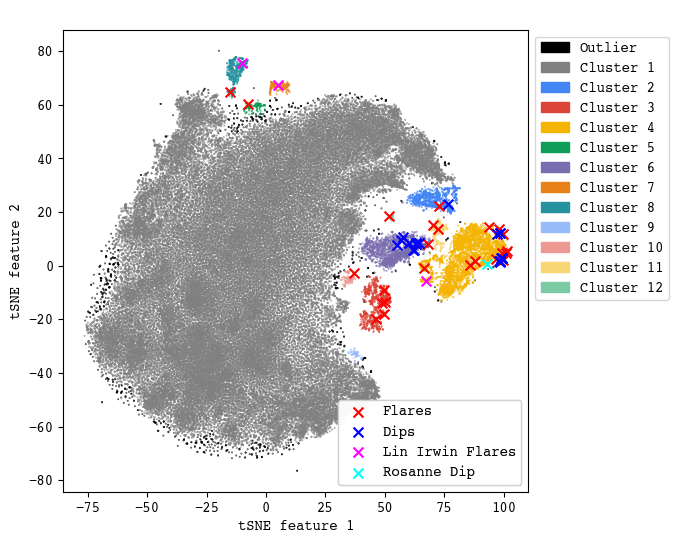

In [140]:
# PLOT
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Define Colour Scheme
google_blue = '#4285F4'
google_red = '#DB4437'
google_yellow = '#F4B400'
google_green = '#0F9D58'
google_purple = '#7A6DAF'
google_orange = '#E98119' ##EB8B14
google_turq = '#26929F'
light_blue = '#98BCF9'
light_red = '#EB9992'
light_yellow = '#F9D674'
light_green = '#7CCAA4'
light_purple = '#B6AFD3'
light_orange = '#F3BA82'
light_turq = '#89C4CB'
dark_blue = '#244985'
dark_red = '#8B2B23'
dark_yellow = '#B18300'
dark_green = '#0A6438'
dark_purple = '#4E456F'
dark_orange = '#945210' 
dark_turq = '#185D65'

colors = ['black', 'grey',google_blue,google_red,google_yellow,google_green,google_purple,google_orange,google_turq, light_blue, light_red, light_yellow, light_green, light_purple, light_orange, light_turq, dark_blue, dark_red, dark_yellow, dark_green, dark_purple, dark_orange, dark_turq]

cmap = ListedColormap(colors[:len(df_tsne_filter['cluster'].unique())])

# Create custom legend handles for clusters
unique_labels = df_tsne_filter['cluster'].unique()
print(unique_labels)
cluster_legend_handles = []
for i in range(len(unique_labels)):
    if i > 0:
        label = 'Cluster ' + str(unique_labels[i]+1)
        color = colors[i % len(colors)]
        cluster_legend_handles.append(mpatches.Patch(color=color, label=label))
    else:
        label = 'Outlier'
        color = colors[i % len(colors)]
        cluster_legend_handles.append(mpatches.Patch(color=color, label=label))

fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.monospace'] = "Courier"
plt.rcParams["font.family"] = "monospace"
cluster = axs.scatter(df_tsne_filter['tsne1'], df_tsne_filter['tsne2'], s=0.1, c=df_tsne_filter['cluster'], cmap=cmap)
axs.set_xlabel('tSNE feature 1')
axs.set_ylabel('tSNE feature 2')
axs.scatter(tsne_flares['tsne1'], tsne_flares['tsne2'], c='red', marker='x', s=50, label='Flares')
axs.scatter(tsne_dips['tsne1'], tsne_dips['tsne2'], c='blue', marker='x', s=50, label='Dips')
axs.scatter(tsne_lin_irwin['tsne1'], tsne_lin_irwin['tsne2'], c='magenta', marker='x', s=50, label='Lin Irwin Flares')
axs.scatter(tsne_rosanne['tsne1'], tsne_rosanne['tsne2'], c='cyan', marker='x', s=50, label='Rosanne Dip')
# axs.set_title(dbscan_file)
axs.set_title('ccdfdftbevereervervvehjjgjggjgjgjgjgjgjgjrververververvwrbgb',c='white', loc='left')

# Combine both legends into a single legend
cluster_legend = axs.legend(handles=cluster_legend_handles, bbox_to_anchor=(1, 1), loc='upper left')
anomaly_legend = axs.legend(bbox_to_anchor=(1, 0), loc='lower right') 
# No handles and labels are passed to create the second legend

# Add both legends to the plot
axs.add_artist(cluster_legend)
axs.add_artist(anomaly_legend)

plt.show()


Text(0.5, 1.0, 'DBSCANres-All-tsne-All-hist3D-All-nE16-nt24-ndt24-normnone-2D-perp90-lr75-ee1-it5555-PCA34.csv-EPS1.8-MS27.csv')

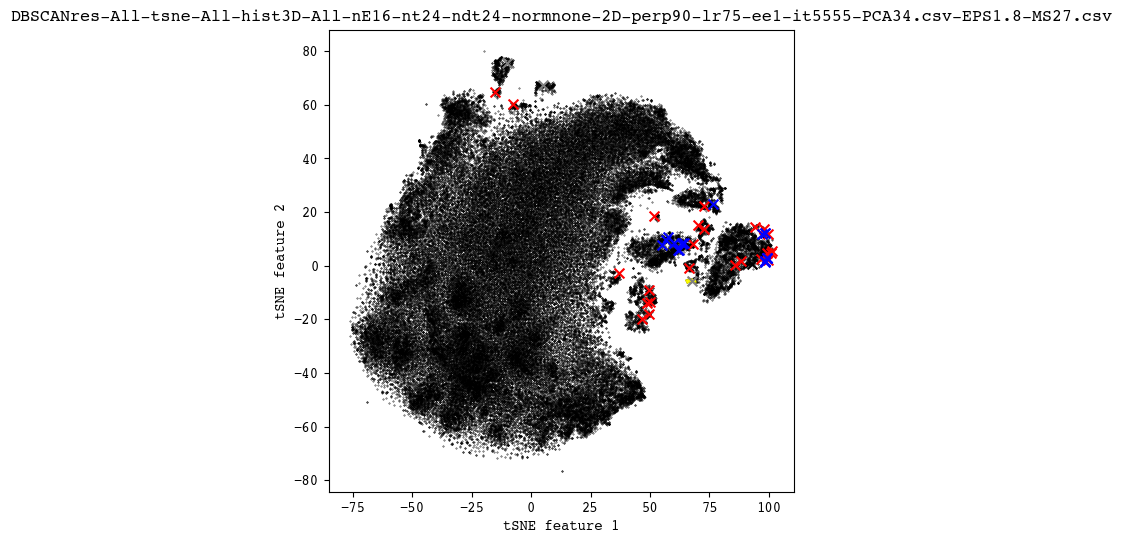

In [191]:
select_clusters = [3]#range(0,10) #[3035] #12,13
df_select = df_tsne_filter[df_tsne_filter['cluster'].isin(select_clusters)]
potential_anomalies = df_select['obsreg_id']
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(potential_anomalies)]
# df_properties_anomalies  = df_properties_anomalies[df_properties_anomalies['var_prob_b'] > 0.5]
df_select = df_select[(df_select['tsne1'] >= 65) & (df_select['tsne1'] <= 69) & (df_select['tsne2'] >= -6) & (df_select['tsne2'] <= -5)]

# df_properties_anomalies.head(500)
# 67.453880	-5.705921	4062_31	3
# df_select = df_select[(df_select['tsne1'] >= 90) & (df_select['tsne1'] <= 95) & (df_select['tsne2'] >= 0.5) & (df_select['tsne2'] <= 1)]


fig, axs = plt.subplots(1, 1, figsize=(6, 6))
plt.rcParams.update({'font.size': 10})
plt.rcParams['font.monospace'] = "Courier"
plt.rcParams["font.family"] = "monospace"
rej = axs.scatter(df_tsne_filter['tsne1'], df_tsne_filter['tsne2'], s=0.1, c='black', label = 'Rejected Clusters')
acc = axs.scatter(df_select['tsne1'], df_select['tsne2'], s=0.1, c='yellow', label = 'Chosen Clusters')
axs.set_xlabel('tSNE feature 1')
axs.set_ylabel('tSNE feature 2')
axs.scatter(tsne_flares['tsne1'], tsne_flares['tsne2'], c='red', marker='x', s=50, label='Flares')
axs.scatter(tsne_dips['tsne1'], tsne_dips['tsne2'], c='blue', marker='x', s=50, label='Dips')
axs.scatter(tsne_rosanne['tsne1'], tsne_rosanne['tsne2'], c='black', marker='x', s=50, label='Rosanne Dip')
axs.scatter(tsne_lin_irwin['tsne1'], tsne_lin_irwin['tsne2'], c='grey', marker='x', s=50, label='Lin Irwin Flares')
axs.set_title(dbscan_file)

Lightcurves

57


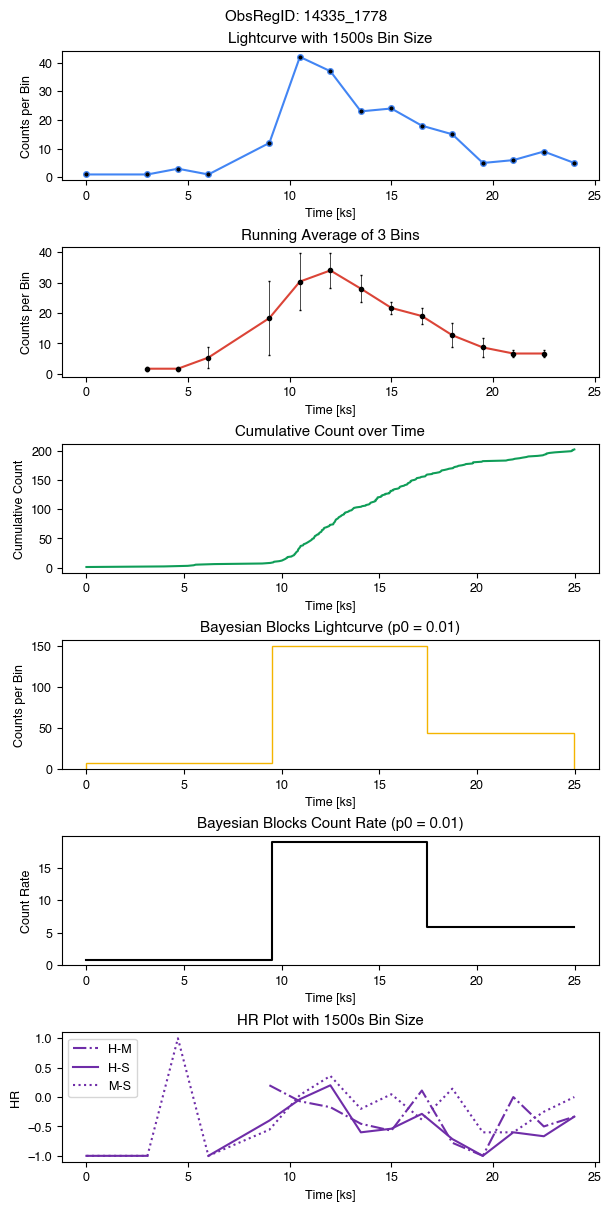

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


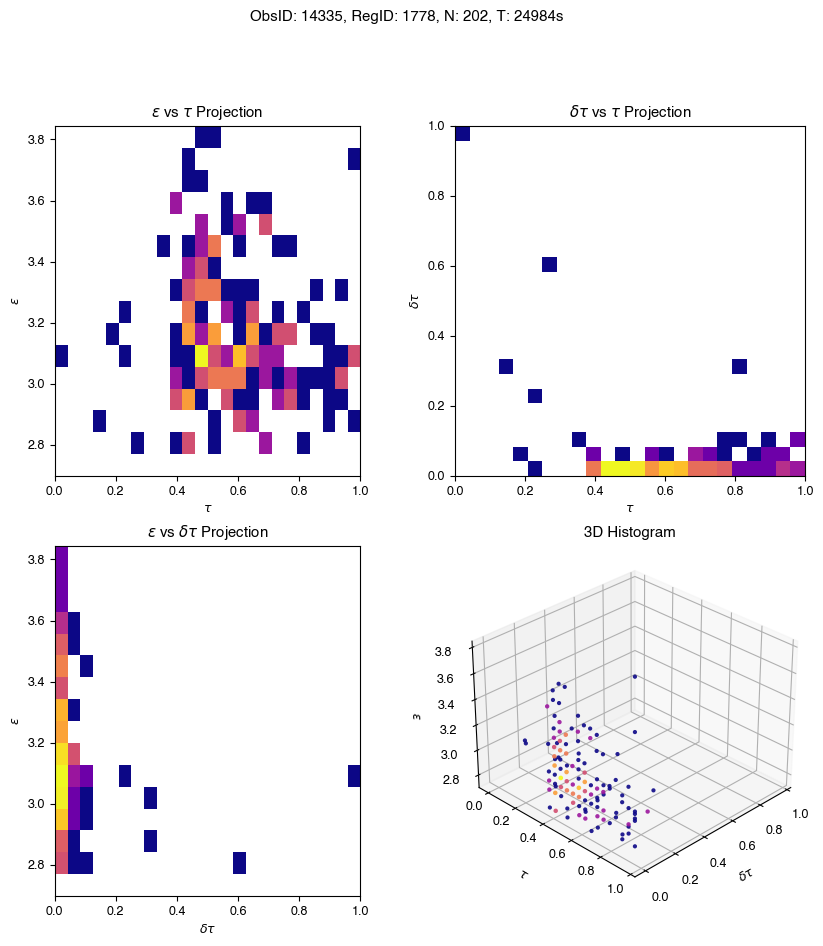

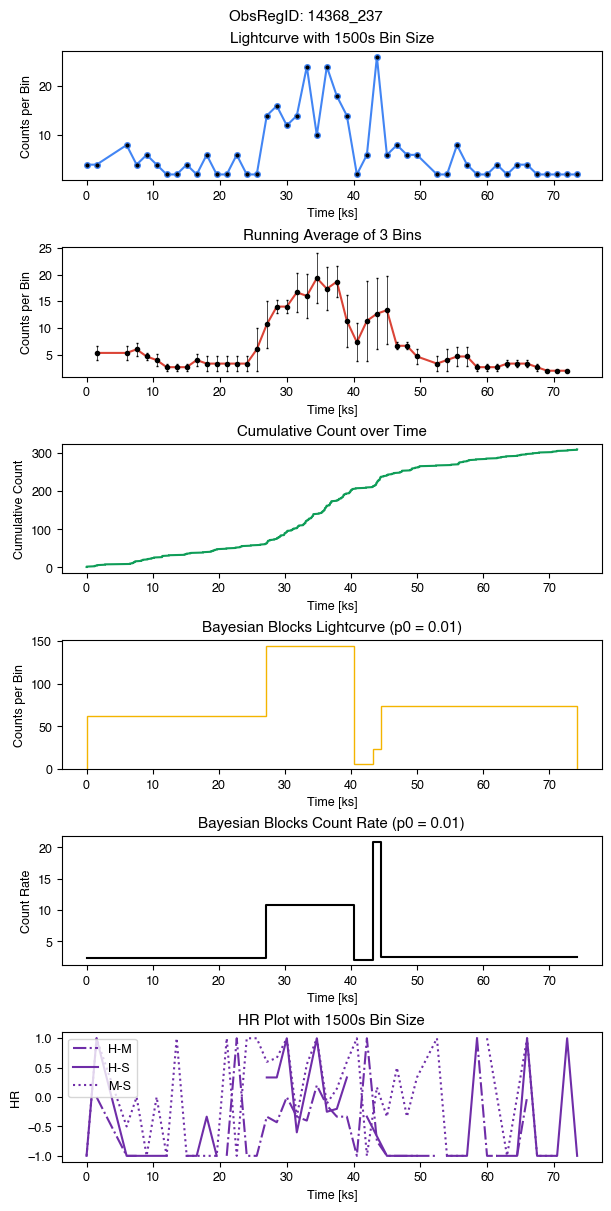

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


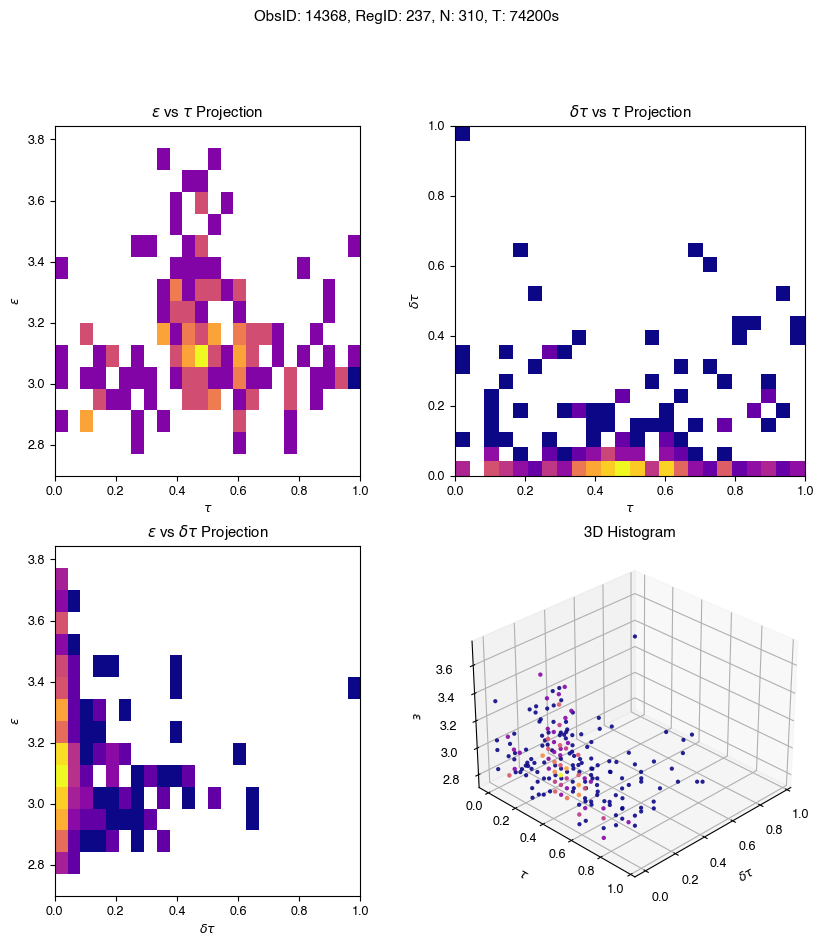

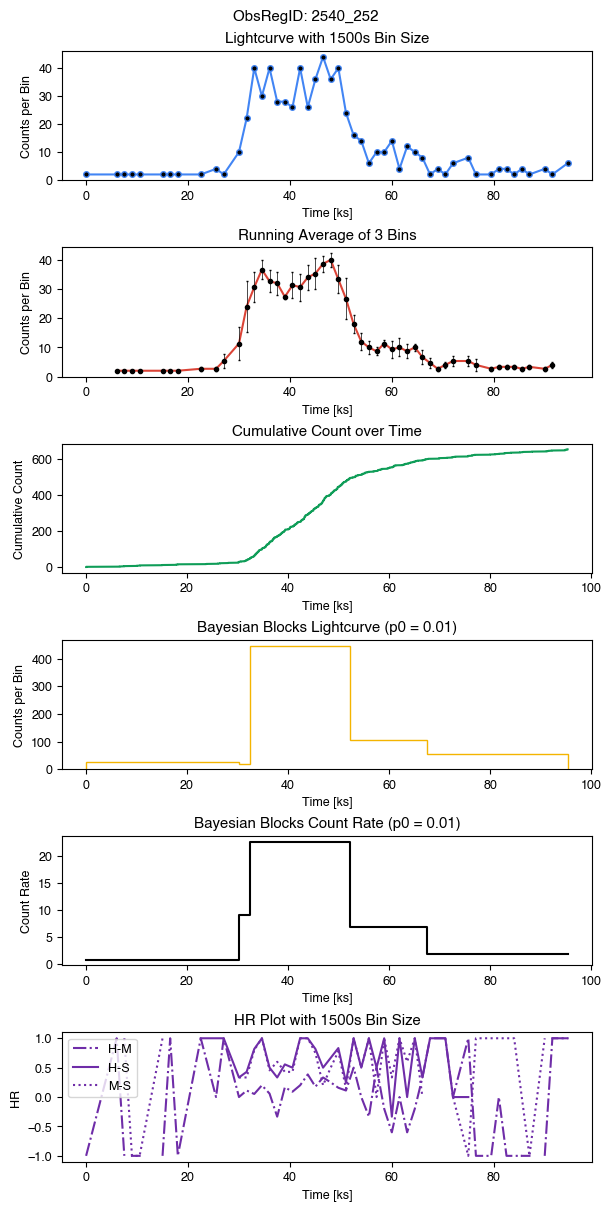

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


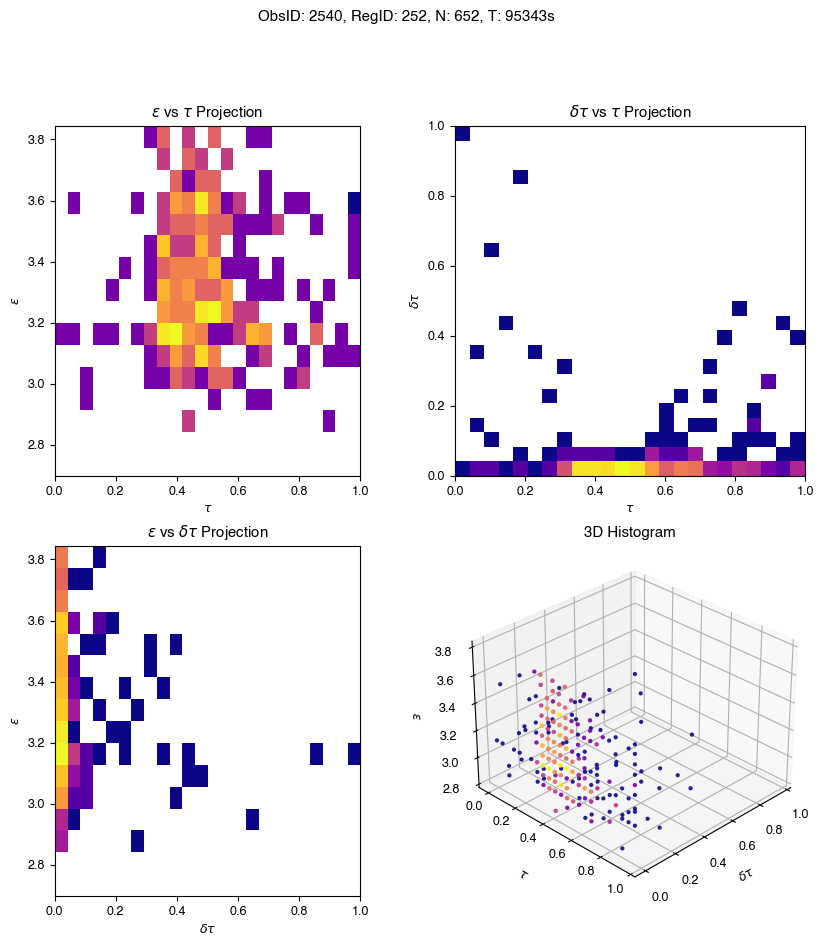

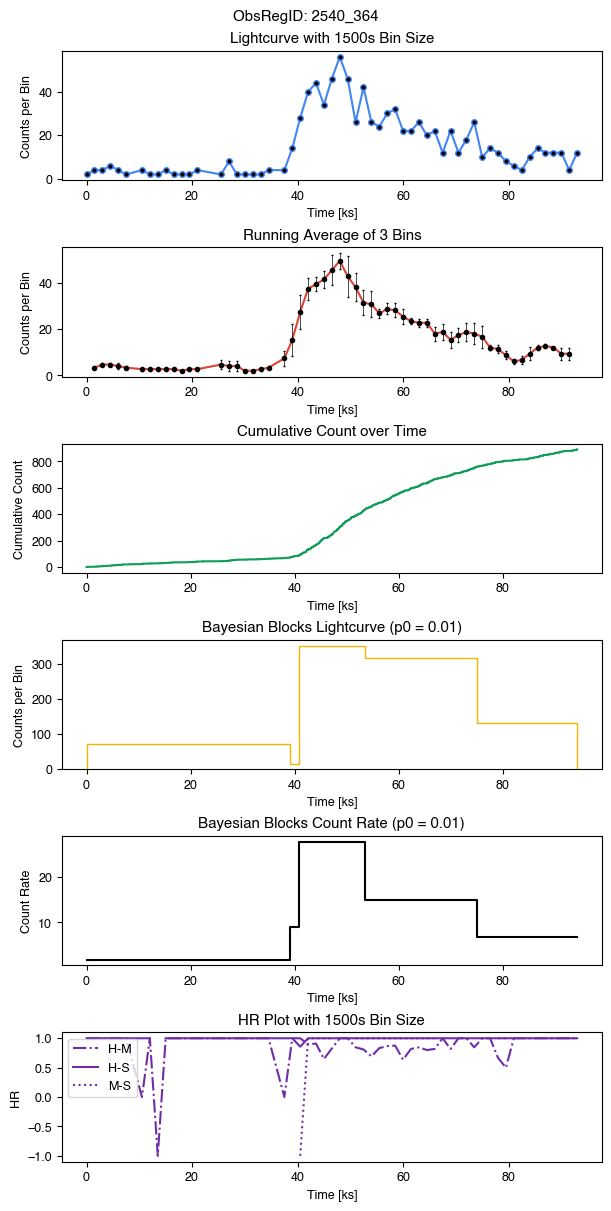

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


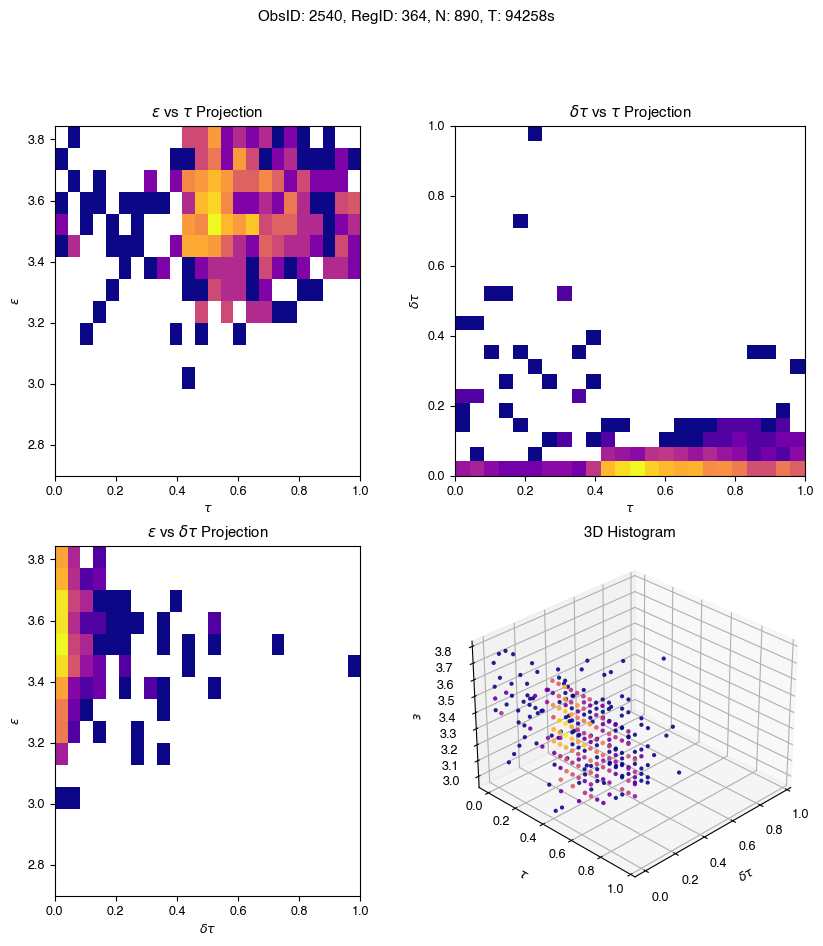

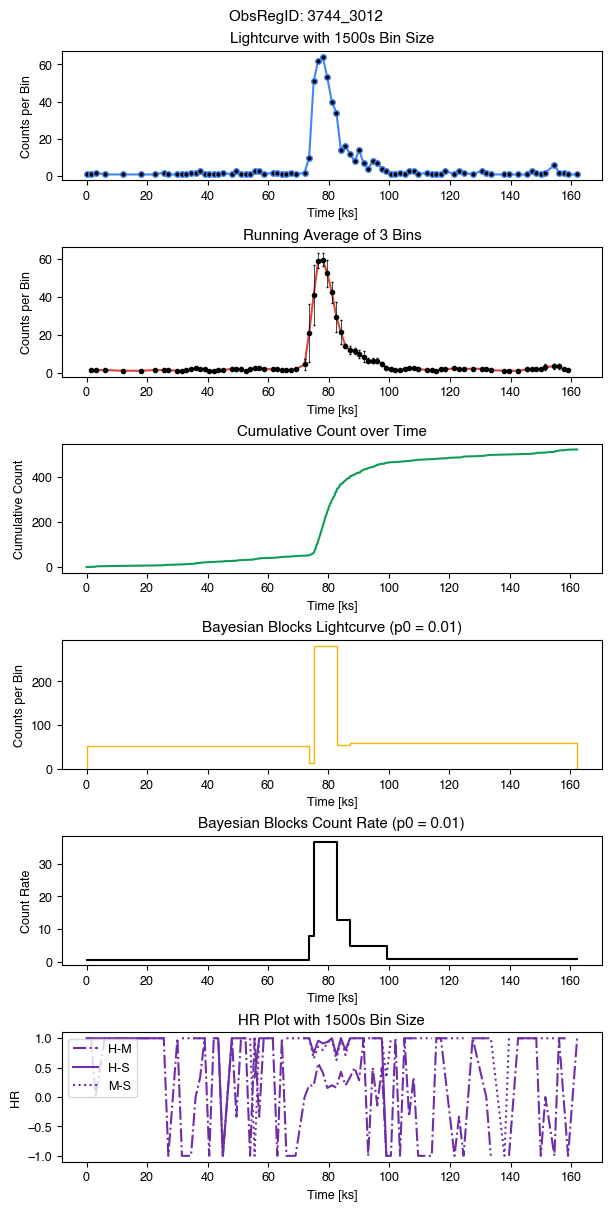

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


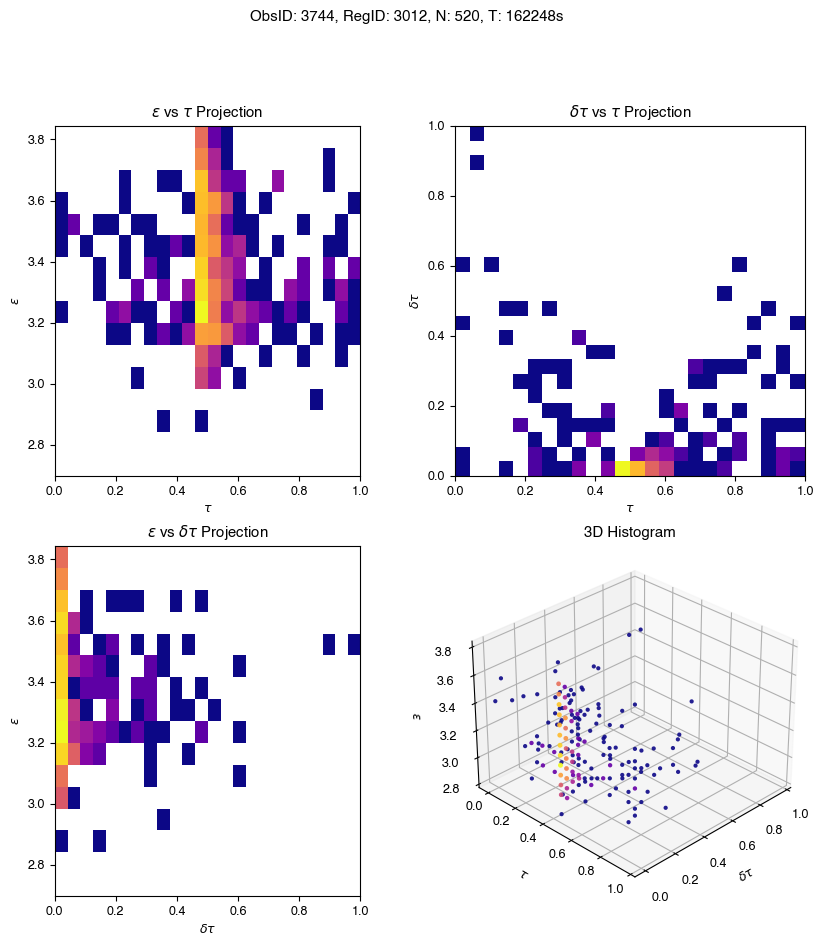

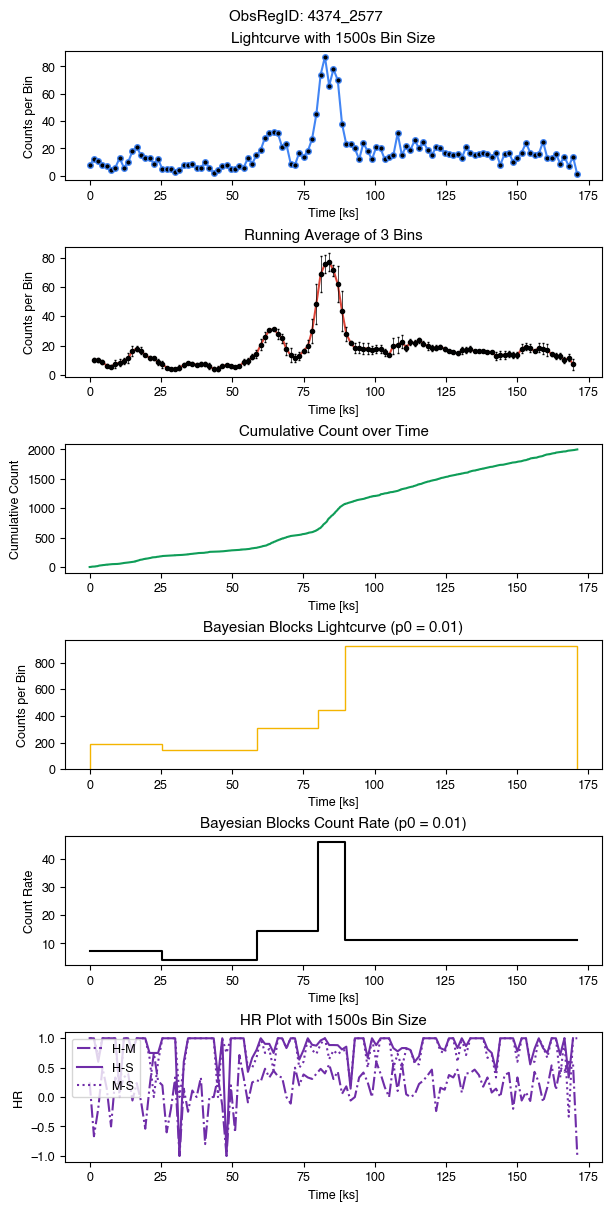

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


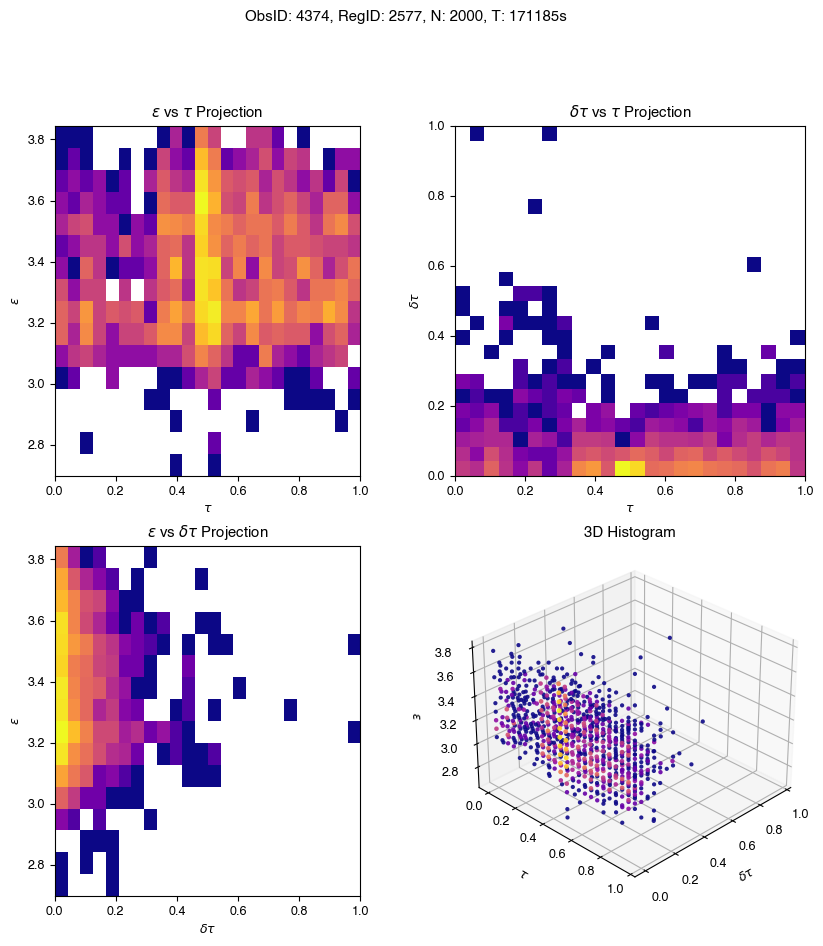

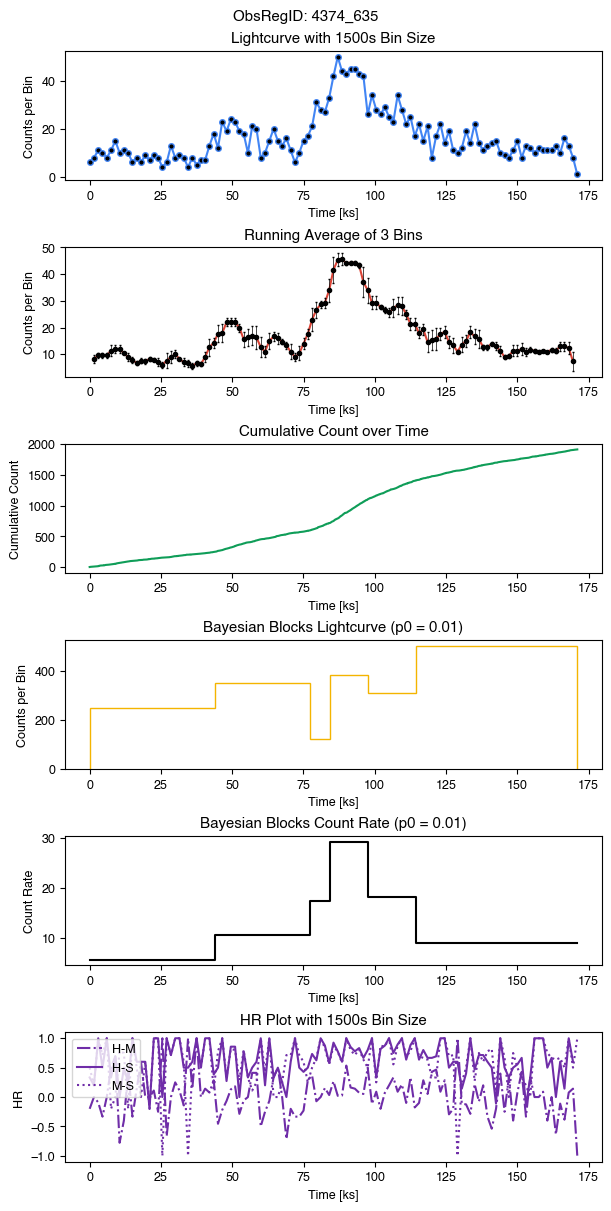

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


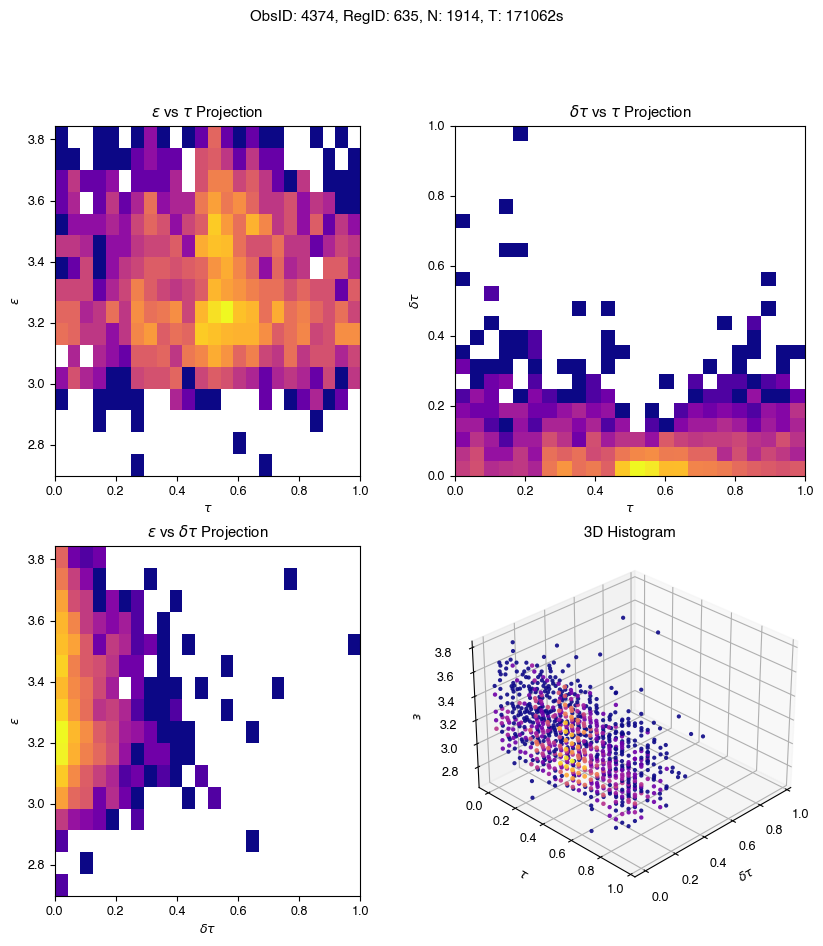

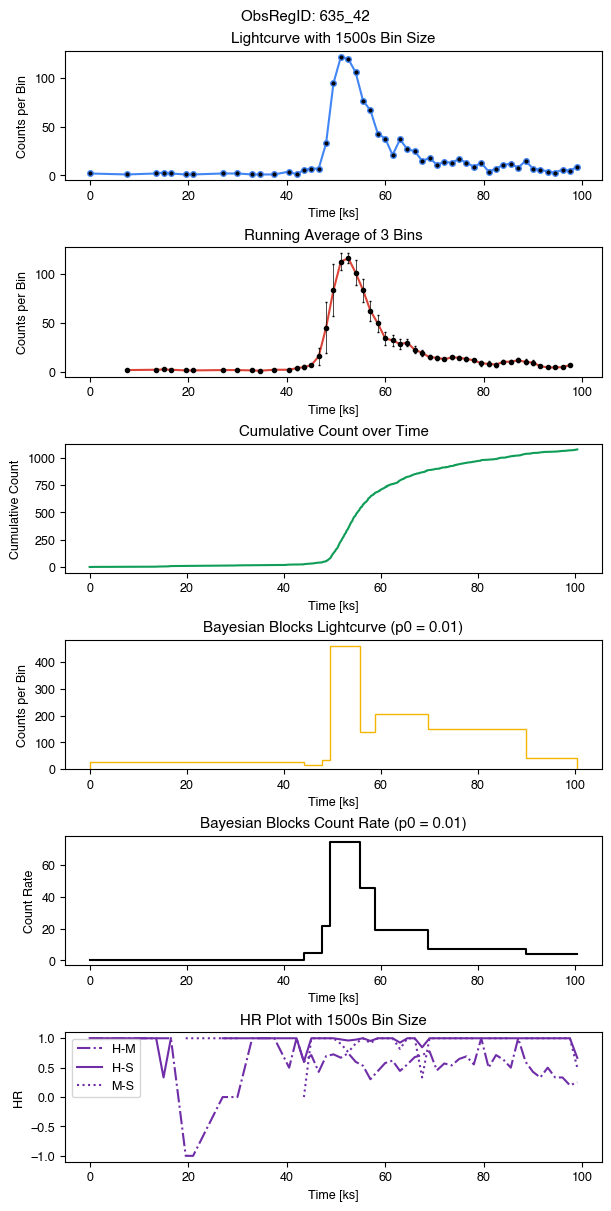

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


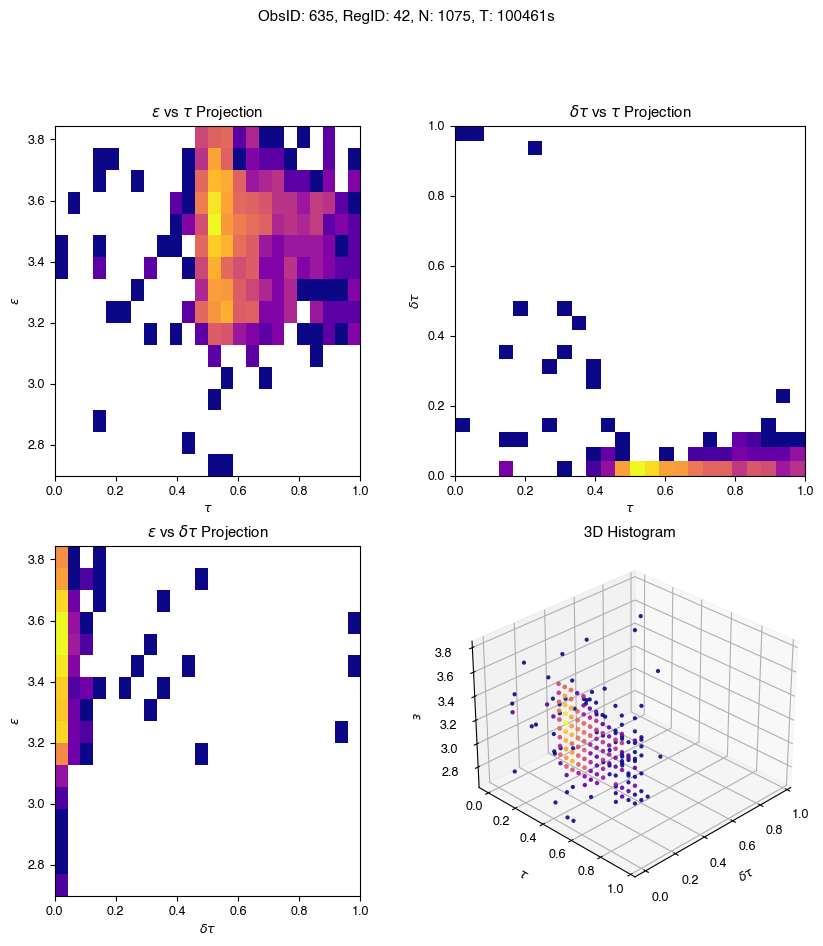

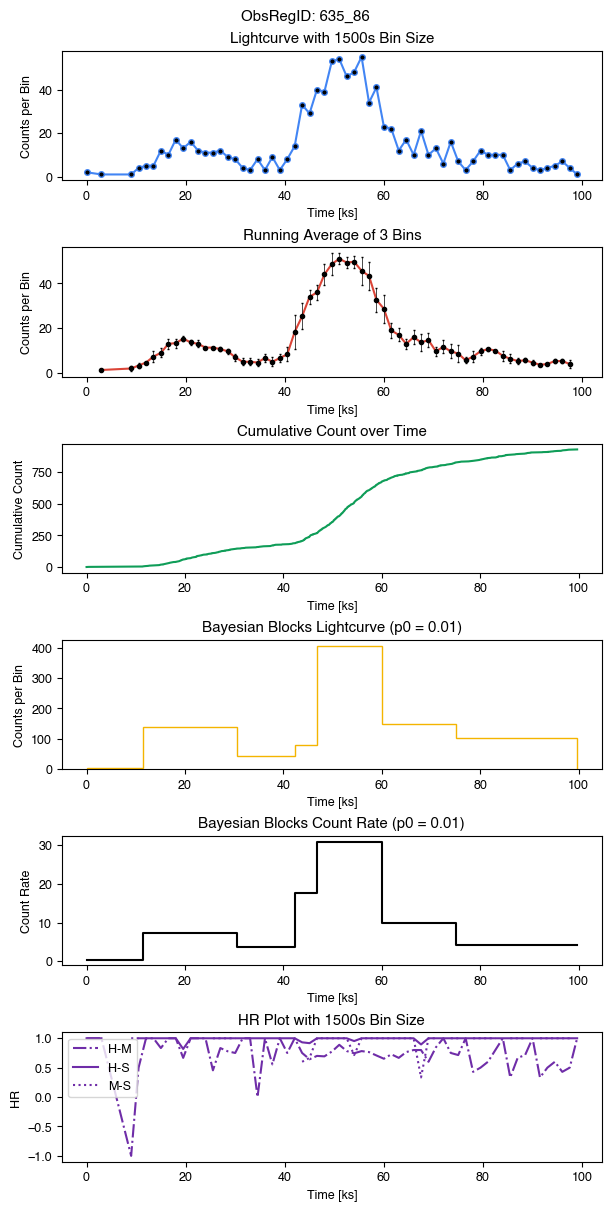

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


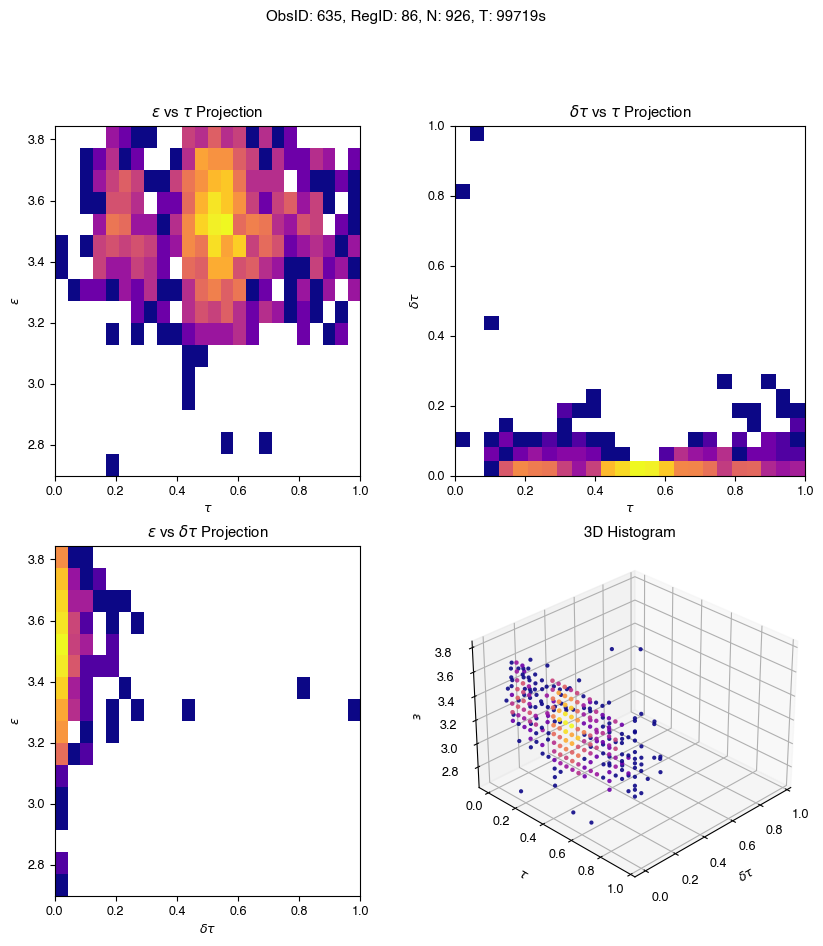

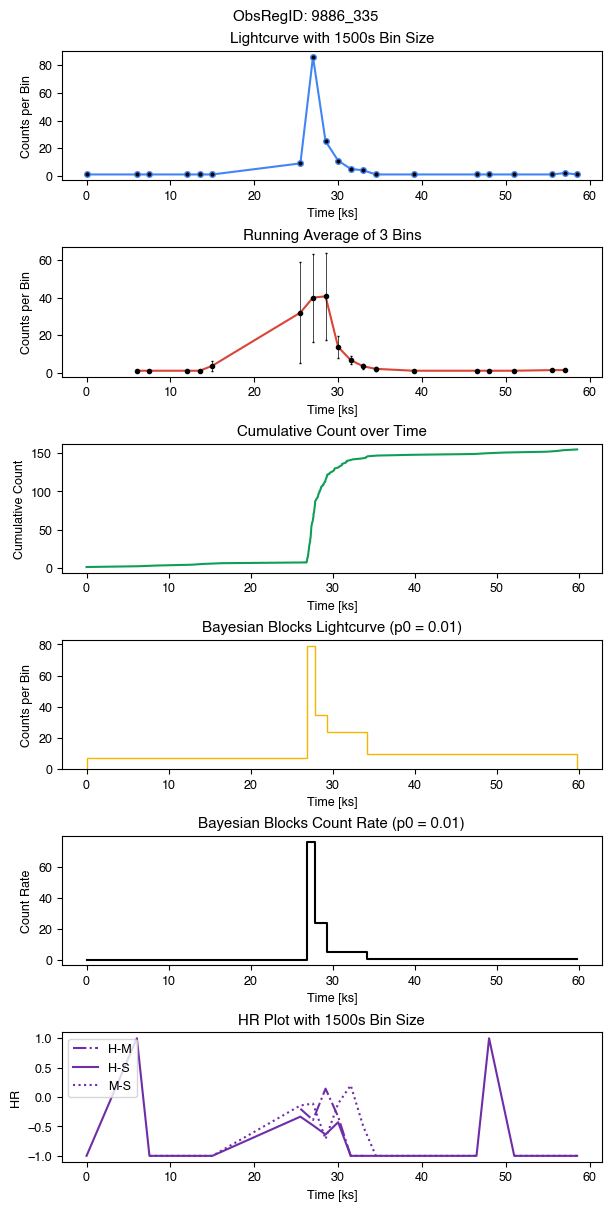

/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)
/opt/anaconda3/envs/ciao-4.15/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: constrained_layout not applied because axes sizes collapsed to zero.  Try making figure larger or axes decorations smaller.
  fig.canvas.print_figure(bytes_io, **kw)


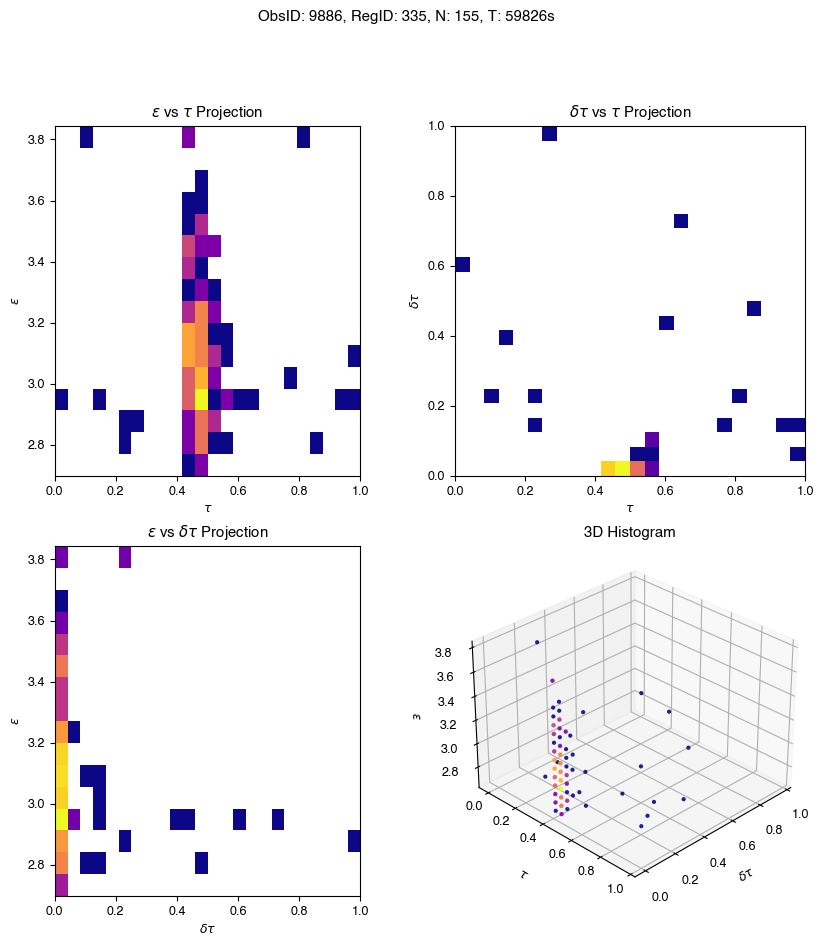

In [194]:
potential_anomalies = df_properties_anomalies['obsreg_id']
potential_anomalies = df_select['obsreg_id']
print(len(potential_anomalies))
keep = potential_anomalies.values[10:20]
# keep = ['13814_86','2540_253','633_2117']
# keep = ['6442_37','11231_250','5424_145','16000_221']
# keep = ['3012_53','3744_830','4373_662','4396_2625','13117_169','13653_40','6291_253']
# keep = ['12330_2071','10135_343','11073_116','11073_116','13951_16']
# keep = potential_anomalies.values
# keep = ['9912_482']

# Image producer
# keep = all_ids[50000:55000]
df_eventfiles_group_filtered = df_eventfiles_group.filter(lambda x: x.name in keep).groupby('obsreg_id')
for id_name, dfi in df_eventfiles_group_filtered:
    dfi.sort_values(by='time', inplace = True) 
    dfi.reset_index(drop=True, inplace = True)
    lightcurveplotter(dfi,id_name,1500,bb_p0=0.01)
    # # hist2D(dfi,id_name,16,24,'minmax',True,'plasma',lognorm=True)
    # # hist2D(dfi,id_name,16,24,'minmax',True,'plasma',lognorm=False)
    hist3D(dfi,id_name,16,24,24,'minmax',True,'plasma',lognorm=True)
    #hist3D(dfi,id_name,16,24,24,'minmax',True,'plasma',lognorm=False)
    # hist3Dlog(dfi,id_name,16,24,24,'minmax',True,'plasma')

In [195]:
potential_anomalies = df_properties_anomalies['obsreg_id']
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(potential_anomalies)]
# keep = ['13814_86','2540_253','633_2117']
df_properties_anomalies = df_properties_global[df_properties_global['obsreg_id'].isin(keep)]
df_properties_anomalies.head(500)

,name,ra,dec,err_ellipse_r0,err_ellipse_r1,err_ellipse_ang,significance,likelihood_class,conf_flag,sat_src_flag,...,hard_hs_hilim,var_prob_b,var_prob_h,var_prob_m,var_prob_s,var_index_b,var_index_w,livetime,detector,obsreg_id
30242,2CXO J053502.8-052208,83.761819,-5.368947,0.710518,0.709973,85.593774,83.599695,TRUE,False,False,...,0.626483,1.0,1.000000,1.000000,0.352010,10.0,NaN,168957.133382,ACIS-1,4374_635
30965,2CXO J053510.2-052321,83.792533,-5.389283,0.710019,0.709926,10.682959,80.928156,TRUE,False,False,...,0.856340,1.0,1.000000,1.000000,0.902660,10.0,NaN,168957.133382,ACIS-1,4374_2577
31223,2CXO J053511.6-052608,83.798605,-5.435722,0.711369,0.710625,53.550538,33.834169,TRUE,False,False,...,0.892567,1.0,1.000000,1.000000,0.999983,10.0,NaN,164166.245516,ACIS-0,3744_3012
32298,2CXO J053515.3-051901,83.813908,-5.317170,0.715678,0.713762,91.780697,24.859520,TRUE,False,False,...,-0.450344,1.0,1.000000,1.000000,1.000000,10.0,NaN,25935.374220,ACIS-2,14335_1778
40777,2CXO J064051.4+093714,100.214308,9.620690,0.715764,0.711714,13.241169,23.594093,TRUE,False,False,...,-0.474079,1.0,0.999994,1.000000,0.418859,9.0,NaN,74442.306301,ACIS-2,14368_237
41372,2CXO J064108.1+093830,100.284124,9.641816,0.732914,0.716298,13.459377,22.211004,TRUE,False,False,...,0.625234,1.0,1.000000,1.000000,0.999831,10.0,NaN,95732.193290,ACIS-0,2540_252
41490,2CXO J064112.8+092909,100.303679,9.485988,0.718931,0.716279,109.041246,22.054083,TRUE,True,False,...,NaN,1.0,1.000000,0.996149,NaN,10.0,NaN,95735.393221,ACIS-1,2540_364
89041,2CXO J162715.4-242640,246.814325,-24.444450,0.786839,0.749880,58.083519,30.927181,TRUE,False,False,...,0.986259,1.0,1.000000,1.000000,0.849878,10.0,NaN,100679.898477,ACIS-2,635_42
89070,2CXO J162727.0-243217,246.862775,-24.538273,0.717353,0.710758,79.946285,28.395490,TRUE,False,False,...,0.991255,1.0,1.000000,1.000000,0.497858,10.0,NaN,100683.098388,ACIS-0,635_86
105281,2CXO J193047.7+185013,292.698891,18.837022,0.850707,0.753356,49.243691,10.950397,TRUE,False,False,...,-0.484072,1.0,1.000000,1.000000,1.000000,10.0,NaN,65331.720439,ACIS-7,9886_335
